# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [49]:
def F(n):
    for i in range(n):
        print('-'*(n-i-1), end = "")
        for j in range(2*i+1):
            letter = abs(i-j)
            print(chr(ord('A')+letter), end = "")
        print('-'*(n-i-1))
        
# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [52]:
def F(d : dict):
    #key values ascending
    keys = list(d.keys())
    keys.sort()
    for i in keys:
        print((str(i) + " " + str(d[i][0]) + " " + str(d[i][1])))
        
    #x values descending
    items = list(d.items())
    newDict = {}
    for item in items:
        if(item[1][0] not in newDict.keys()):
            newDict[item[1][0]] = [item[0], ]
        else:
            newDict[item[1][0]].append(item[0])
    dOccurences = {}
    for item in newDict:
        dOccurences[item] = len(newDict[item])
    xCoords = list(newDict.keys())
    xCoords.sort(reverse = True)
    for i in xCoords:
        for j in range(dOccurences[i]):
            key = newDict[i][j]
            print((str(key) + " " + str(d[key][0]) + " " + str(d[key][1])))
        
    #x values descending
    items = list(d.items())
    newDict = {}
    for item in items:
        if(item[1][1] not in newDict.keys()):
            newDict[item[1][1]] = [item[0], ]
        else:
            newDict[item[1][1]].append(item[0])
    dOccurences = {}
    for item in newDict:
        dOccurences[item] = len(newDict[item])
    yCoords = list(newDict.keys())
    yCoords.sort(reverse = True)
    for i in yCoords:
        for j in range(dOccurences[i]):
            key = newDict[i][j]
            print((str(key) + " " + str(d[key][0]) + " " + str(d[key][1])))

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

1 1 2
2 -1 4
4 2 3
5 -4 3
4 2 3
1 1 2
2 -1 4
5 -4 3
2 -1 4
5 -4 3
4 2 3
1 1 2
-8 4 2
5 9 -10
6 -3 4
7 2 1
5 9 -10
-8 4 2
7 2 1
6 -3 4
6 -3 4
-8 4 2
7 2 1
5 9 -10


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [56]:
f = open('student_records.csv', 'r')
lines = f.read().split('\n')
f.close()
data = []
for line in lines:
    data.append(line.split(','))

#printing first 10 rows excluding the headings i.e. 11 rows
for row in data[:11]:
    for element in row:
        print(element, end = " ")
    print()

roll_number department credit course_name course_type grade 
588946 MA 3 EC250 hasmed_elective AB 
145372 EP 4 EP407 hasmed_elective CC 
834515 MA 8 EP885 hasmed_elective BB 
344265 CSE 6 CSE699 honours AB 
358405 MA 3 EE460 minor AP 
781075 CE 8 CE540 honours CC 
180828 CSE 6 CE880 minor AB 
981238 MM 4 CSE226 minor AB 
836881 MM 8 MM530 core AA 
310604 EE 8 EE202 core AB 


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [59]:
del data[0]
del data[-1]
credits = 0
students = {}
courses = []
grades = {"AP" : 10, "AA" : 10, "AB" : 9, "BB" : 8, "BC" : 7, "CC" : 6}

for lists in data:
    row = lists.copy()
    course = row[3]
    if course not in courses:
        courses.append(course)
        credits += int(row[2])
    if (row[0] not in students):
        students[row[0]] = []
    students[row[0]].append((int(row[2]), grades[row[5]]))

print(credits)

for item in students:
    weightedCreds = 0
    creds = 0
    for course in students[item]:
        weightedCreds += course[0]*course[1]
        creds += course[0]
    print(str(item) + " " + str(weightedCreds/creds))

16618
588946 8.693467336683417
145372 7.745664739884393
834515 8.21608040201005
344265 8.699346405228757
358405 8.587378640776699
781075 8.170731707317072
180828 8.096045197740112
981238 8.244047619047619
836881 8.386178861788618
310604 8.333333333333334
847809 8.210727969348659
773982 8.068181818181818
500658 8.16826923076923
810863 8.151041666666666
124663 8.126637554585153
364146 8.395555555555555
871746 8.212962962962964
270007 8.033195020746888
597353 8.12
986057 8.06532663316583
718510 8.429347826086957
836431 7.9
379479 8.246153846153845
582912 8.656108597285067
788020 8.015544041450777
613401 8.440191387559809
144528 8.157894736842104
485484 8.36111111111111
680096 8.045751633986928
199713 8.290697674418604
851029 8.322981366459627
845623 8.375527426160337
150503 8.289017341040463
214270 7.877729257641922
517837 8.580487804878048
482623 8.401574803149606
721490 8.34468085106383
955757 8.290836653386455
589528 8.732026143790849
143856 8.487562189054726
571782 8.423963133640553
9

#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [62]:
#there are no names in the file. printing roll numbers instead (for 2.c, 2.d and 2.e)
students = {}
key = {"core" : 0, "department_elective" : 1, "flexible_elective" : 2, "hasmed_elective" : 3}
for row in data:
    if row[0] not in students:
        students[row[0]] = [0, 0, 0, 0]
    if(row[4] in key):
        students[row[0]][key[row[4]]] += int(row[2])
for roll_no in students:
    if(students[roll_no][0] >= 20) and (students[roll_no][1] >= 15) and (students[roll_no][2] >= 10) and (students[roll_no][3] >= 5):
        print(roll_no)

588946
834515
781075
180828
981238
836881
310604
773982
500658
810863
124663
871746
986057
379479
144528
485484
845623
150503
214270
517837
482623
721490
955757
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
970791
143142
998293
681499
888886
608522
362471
692318
626000
581065
787967
381227
750259
881983
294697


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [65]:
#students has the format-> roll_no : {dept : credits}
#deciding 'specific dept.' as the dept from which the course originates and NOT the dept of student
students = {}
for row in data:
    if row[4] == "minor":
        if row[0] not in students:
            students[row[0]] = {}
        if [row[3][:-3]] not in tuple(students[row[0]]):
            students[row[0]][row[3][:-3]] = 0
        students[row[0]][row[3][:-3]] += int(row[2])
for roll_no in students:
    #print(roll_no, students[roll_no])
    #nobody has a minor
    for dept in students[roll_no]:
        if(students[roll_no][dept] >= 10):
            print(roll_no)
            break

#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [68]:
students = {}
for row in data:
    if row[0] not in students:
        #first element is core creds and second is honors
        students[row[0]] = [0, 0]
    if row[4] == "core":
        students[row[0]][0] += int(row[2])
    elif row[4] == "honours":
        students[row[0]][1] += int(row[2])

for roll_no in students:
    if (students[roll_no][0] >= 20) and (students[roll_no][1] >= 10):
        print(roll_no)

588946
145372
834515
781075
836881
310604
773982
500658
810863
124663
364146
871746
986057
718510
379479
582912
788020
613401
144528
485484
199713
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
327122
534763
391848
971123
207443
488661
782129
928288
581858
282482
572815
608952
628849
630568
388969
159438
870642
970791
143142
998293
681499
888886
608522
362471
465496
208100
692318
626000
458200
581065
787967
750259
881983
294697


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [72]:
import numpy as np
from scipy import *
from scipy.optimize import minimize

def f(x):
    return (2*((x[0]-x[1]-3)**2) + 4*((x[0]+2*x[1]+1)**4))

cons = ({'type' : 'ineq', 'fun' : lambda x: x[0] - x[1] + 3},
        {'type' : 'ineq', 'fun' : lambda x: 5 - (x[0] + 2)**2 - (x[1] + 1)**2})
minimize(f, (0, 0), constraints = cons)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.345026216977383
       x: [ 2.349e-01 -9.285e-01]
     nit: 9
     jac: [-1.120e+01 -3.582e-01]
    nfev: 31
    njev: 9

# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [75]:
import numpy as np
from scipy import *
from scipy.integrate import quad

def f(x):
    return ((np.cos(x)**2 + np.sin(x)**4)*np.sqrt(3))
print(quad(f, 0, 2*np.pi))

(9.522446662229642, 9.984747195712629e-10)


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [79]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [81]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data = []
    with open(data_path, 'r') as reader:
        data = reader.read()
        data = data.replace("\n", ',')
        data = data.split(',')
        del data[-1]
        N = int(len(data)/2)
        array = np.array(data, dtype = np.float32)
        array = np.reshape(array, (N, 2))
        return array

In [83]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    N = data.shape
    N = N[0]
    if init_centers == None:
        indices = np.random.randint(0, N, (K, ))
        init_centers = data[indices]
    return init_centers

In [85]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones((len(data), ), dtype = np.int32)

In [87]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    N = data.shape
    K = centers.shape
    N = N[0]
    K = K[0]
    data = np.resize(data, (K, N, 2))
    data = np.transpose(data, (1, 0, 2))
    np.resize(centers, (N, K, 2))
    # print("data.shape: ", data.shape)
    # print("centers.shape: ", centers.shape)
    result = (data-centers)**2
    # print ("result.shape: ", result.shape)
    result = np.transpose(result, (1, 2, 0))
    # print ("result.shape after transpose: ", result.shape)
    result = np.reshape(result, (2, -1))
    # print ("result.shape after reshaping: ", result.shape)
    result_new = np.sqrt(result[0]+result[1])
    # print ("result_new.shape: ", result_new.shape)
    result_new = np.reshape(result_new, (N, K))
    return result_new

In [89]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis = 1)

In [91]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    N = data.shape
    N = N[0]
    coords = {}
    occurences = {}
    count = 0
    for i in labels:
        if i not in coords:
            coords[i] = [0, 0]
            occurences[i] = 0
        coords[i][0] += data[count, 0]
        coords[i][1] += data[count, 1]
        occurences[i] += 1
        count += 1
    centers = np.array(list(dict(sorted(coords.items())).values()))
    nPoints = np.array(list(dict(sorted(occurences.items())).values()))
    nPoints = np.resize(nPoints, (K, 2))
    centers = centers / nPoints
    return centers
# data = load_data('spice_locations.txt')    
# centers = initialise_centers(data, 3, init_centers)
# labels = initialise_labels(data)
# distances = calculate_distances(data, centers)
# labels_new = update_labels(distances)
# centers = update_centers(data, labels_new, K)

In [93]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return (labels1 == labels2).all()

In [95]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [97]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'

    ### Set xlabel as 'Longitude'

    ### Set ylabel as 'Latitude'

    ### Save the plot as 'kmeans.png'
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('K-means clustering')
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.002468585968017578


<module 'matplotlib.pyplot' from 'C:\\Users\\visha\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

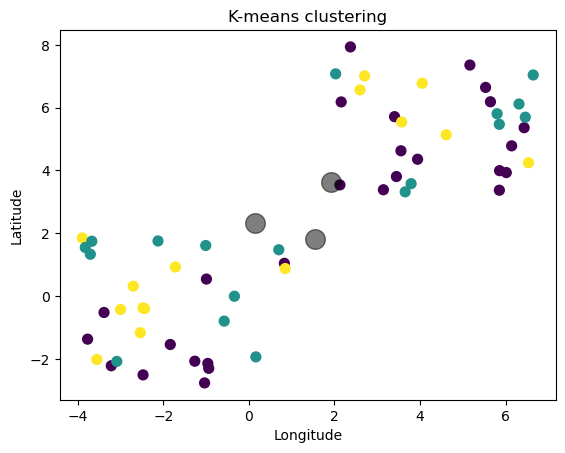

In [99]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 3, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)